### Purpose:
* This notebook will serve as a submission for the EDA of the dataset
* The dataset was pulle from the Protein Data Bank Archive
* https://www.rcsb.org/
* The data contains bioloigcal molecules, not just proteins, as well as other metrics such as moleculare weight, crystalization temp, and density in solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
proteins = pd.read_csv("proteins_1.csv",index_col=0).reset_index()

In [3]:
proteins.head()

,index,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [4]:
proteins.shape

(346325, 17)

### What are column names are present?

In [5]:
for col in proteins.columns:
    print(col)

index
structureId
chainId
sequence
residueCount
macromoleculeType
classification
experimentalTechnique
resolution
structureMolecularWeight
crystallizationMethod
crystallizationTempK
densityMatthews
densityPercentSol
pdbxDetails
phValue
publicationYear


### Lets take a look at the null values present in the data?

In [6]:
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346325 entries, 0 to 346324
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     346325 non-null  int64  
 1   structureId               346325 non-null  object 
 2   chainId                   346323 non-null  object 
 3   sequence                  346322 non-null  object 
 4   residueCount              346325 non-null  int64  
 5   macromoleculeType         346325 non-null  object 
 6   classification            346324 non-null  object 
 7   experimentalTechnique     346325 non-null  object 
 8   resolution                330232 non-null  float64
 9   structureMolecularWeight  346325 non-null  float64
 10  crystallizationMethod     240597 non-null  object 
 11  crystallizationTempK      243934 non-null  float64
 12  densityMatthews           307481 non-null  float64
 13  densityPercentSol         307615 non-null  f

Text(0, 0.5, 'Column Name')

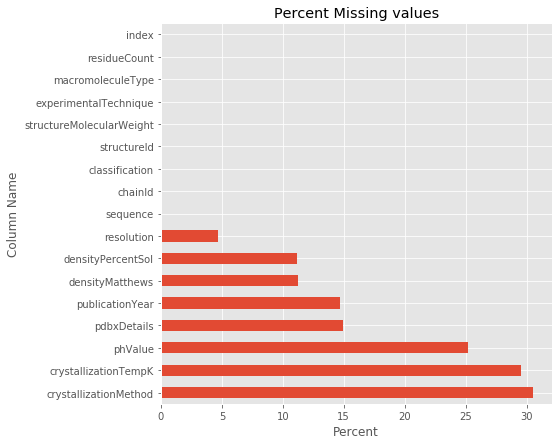

In [7]:
pd.DataFrame((proteins.isna().sum(axis=0) / proteins.shape[0]*100)).sort_values(by =0, ascending=False).plot.barh(figsize=(7,7
                                                                                                                          ),legend=None)
plt.title('Percent Missing values')
plt.xlabel('Percent')
plt.ylabel('Column Name')

For the project, I will be needing only the sequences, so I can disregard everything else

### How many unique classifcations of proteins are there?

In [8]:
len(pd.DataFrame(proteins['classification'].value_counts()))

4468

Depending on how deep the classification problem should be, this could be a 4468 clasification problem or I could just pick a few. Or I could try to find similar ones and bunch them together. I think going forward I may want to pick 20 or so, and create a classifiier from that. Here are the top 20 protein classes by count

In [9]:
pd.DataFrame(proteins['classification'].value_counts()).head(25).reset_index()

,index,classification
0,HYDROLASE,46336
1,TRANSFERASE,36424
2,OXIDOREDUCTASE,34322
3,IMMUNE SYSTEM,15615
4,LYASE,11682
5,HYDROLASE/HYDROLASE INHIBITOR,11218
6,TRANSCRIPTION,8919
7,VIRAL PROTEIN,8495
8,TRANSPORT PROTEIN,8371
9,VIRUS,6972


In [10]:
for index,row in pd.DataFrame(proteins['classification'].value_counts()).head(25).reset_index().iterrows():
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


Text(0, 0.5, 'Class')

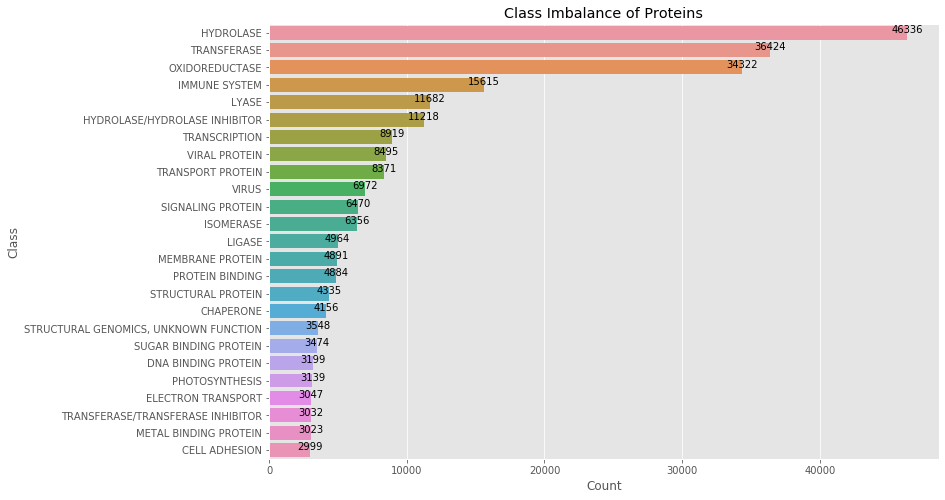

In [11]:
plt.figure(figsize=(12,8))
g = sns.barplot(data= pd.DataFrame(proteins['classification'].value_counts()).head(25).reset_index(),
            x = 'classification',y='index')
for index,row in pd.DataFrame(proteins['classification'].value_counts()).head(25).reset_index().iterrows():
    g.text(row.classification, index, row.classification, ha='center')
plt.title('Class Imbalance of Proteins')
plt.xlabel('Count')
plt.ylabel('Class')




### I was curious to see how many proteins were added to the database by year.

In [12]:
values = list(proteins['publicationYear'].value_counts())
indices = proteins['publicationYear'].value_counts().index
proteins_in_years = pd.DataFrame(indices,columns=['Year'])
proteins_in_years['Values'] = values
proteins_in_years.sort_values(by='Year',inplace=True,ascending=True)
proteins_in_years

,Year,Values
47,201.0,2
49,1969.0,1
46,1970.0,3
48,1971.0,1
43,1972.0,8
45,1974.0,7
40,1975.0,12
39,1976.0,20
41,1977.0,11
44,1978.0,7


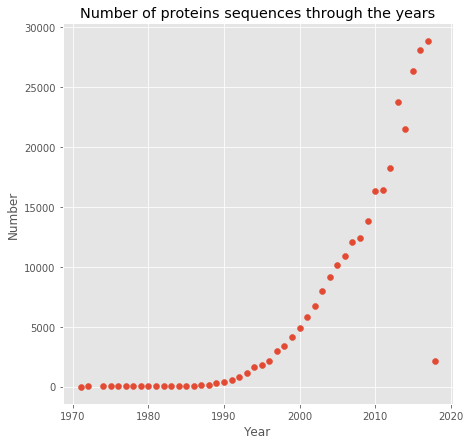

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(proteins_in_years['Year'][proteins_in_years['Year'] > 1970] ,
         proteins_in_years['Values'][proteins_in_years['Year'] > 1970])
plt.title("Number of proteins sequences through the years")
plt.xlabel('Year')
plt.ylabel("Number")
plt.show()

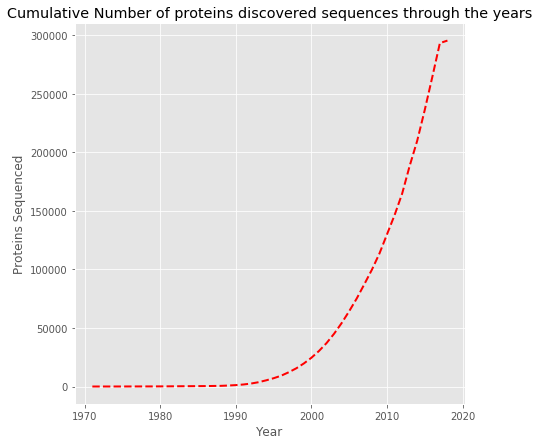

In [14]:
plt.figure(figsize=(7,7))
plt.plot(proteins_in_years['Year'][proteins_in_years['Year'] > 1970] ,
         np.cumsum(proteins_in_years['Values'][proteins_in_years['Year'] > 1970]),'r--',lw =2)
plt.title("Cumulative Number of proteins discovered sequences through the years")
plt.xlabel('Year')
plt.ylabel("Proteins Sequenced")
plt.show()

### What are the the distribution of amino acid lengths for proteins?
* First drop the NaN's present in the sequences column

In [15]:
len(proteins) - sum(proteins['sequence'].notnull())

3

There were only three missing, that's not bad! Let's go ahead and drop them.

In [16]:
len(proteins)
proteins = proteins[proteins['sequence'].notnull()]
len(proteins)

346322

In [17]:
lengths_of_seqs = []
for i in range(0,proteins.shape[0]):
    lengths_of_seqs.append(len(proteins['sequence'].iloc[i]))
proteins['num_residues'] = lengths_of_seqs

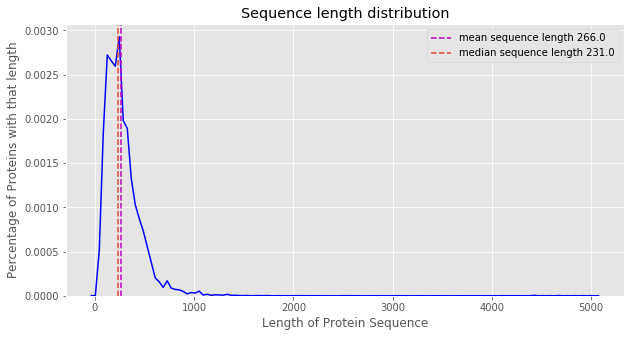

In [18]:
plt.figure(figsize=(10,5))
sns.kdeplot(lengths_of_seqs,color='b')
plt.title('Sequence length distribution')
plt.xlabel('Length of Protein Sequence')
plt.ylabel('Percentage of Proteins with that length')
plt.axvline(np.mean(lengths_of_seqs),linestyle="--",color='m',label='mean sequence length '+str(np.round(np.mean(lengths_of_seqs))))
plt.axvline(np.median(lengths_of_seqs),linestyle="--",label='median sequence length '+str(np.round(np.median(lengths_of_seqs))))
#plt.axvline(np.percentile(lengths_of_seqs,1),linestyle="--",label='median sequence length '+str(np.round(np.percentile(lengths_of_seqs,.999))))

plt.legend()
plt.show()
#plt.hist(lengths_of_seqs,bins=100)
#plt.show()

In [19]:
proteins['residueCount_log'] = np.log2(proteins['residueCount'])

In [20]:
proteins['num_residues_log'] = np.log2(proteins['num_residues'])

In [21]:
proteins.head()

,index,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,num_residues,residueCount_log,num_residues_log
0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,7.266787,7.266787
1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,165,7.366322,7.366322
2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,7.266787,7.266787
3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,167,7.383704,7.383704
4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,154,7.266787,7.266787


Most protein sequences do not exceed a length of more than 1000. Let's take a look at what those are


In [22]:
proteins[proteins['residueCount'] > 1000]['classification'].value_counts()

OXIDOREDUCTASE                           20822
HYDROLASE                                19813
TRANSFERASE                              15621
HYDROLASE/HYDROLASE INHIBITOR             6666
LYASE                                     6421
                                         ...  
PENICILLIN-BINDING PROTEIN/ANTIBIOTIC        2
TRANSFERASE-HYDROLASE                        2
LIGASE/LIGASE inhibitor                      2
TRANSLATION,TRANSFERASE                      1
HYDROLASE,PROTEIN TRANSPORT                  1
Name: classification, Length: 1269, dtype: int64

### Does this distrbution compare to the other classes of proteins?
* Since there are more than 4000 classes, lets just pick the top 15 or so and compare them

In [23]:
top_25 = list(proteins['classification'].value_counts()[:25].index)
top_25

['HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'LYASE',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'VIRUS',
 'SIGNALING PROTEIN',
 'ISOMERASE',
 'LIGASE',
 'MEMBRANE PROTEIN',
 'PROTEIN BINDING',
 'STRUCTURAL PROTEIN',
 'CHAPERONE',
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
 'SUGAR BINDING PROTEIN',
 'DNA BINDING PROTEIN',
 'PHOTOSYNTHESIS',
 'ELECTRON TRANSPORT',
 'TRANSFERASE/TRANSFERASE INHIBITOR',
 'METAL BINDING PROTEIN',
 'CELL ADHESION']

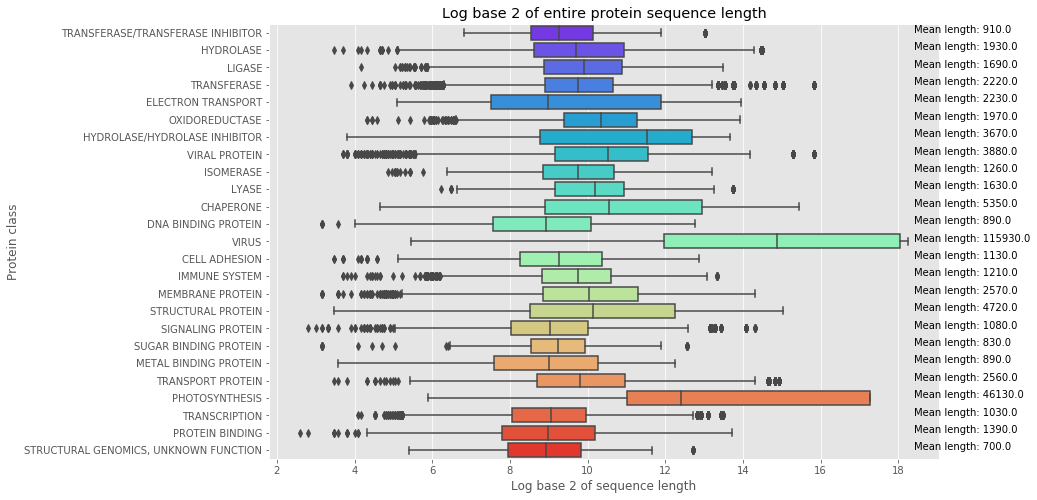

In [24]:
import seaborn as sns
plt.figure(figsize=(12,8))
g = sns.boxplot(y="classification", x="residueCount_log",
                 data=proteins[proteins['classification'].isin(top_25)], palette="rainbow")
plt.title('Log base 2 of entire protein sequence length')
plt.xlabel('Log base 2 of sequence length')
plt.ylabel('Protein class')
for i,prot in enumerate(g.get_yticklabels()):
    label = str(prot).split("'")[1]
    prot_resdcnt = proteins[proteins['classification'] == label]['residueCount']
    mean = np.mean(prot_resdcnt)
    g.text(18.4,i,"Mean length: "+str(np.round(mean,-1)))




Perform ANOVA TEST

In [30]:
all_log_residue_count = []
for i in top_25:
    list_to_add = list(proteins[proteins['classification'] == i]["residueCount_log"])
    all_log_residue_count.append(list_to_add)

In [44]:
import scipy.stats as stats
f,p = stats.f_oneway(*all_log_residue_count)
f,p

(3289.2051364542663, 0.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

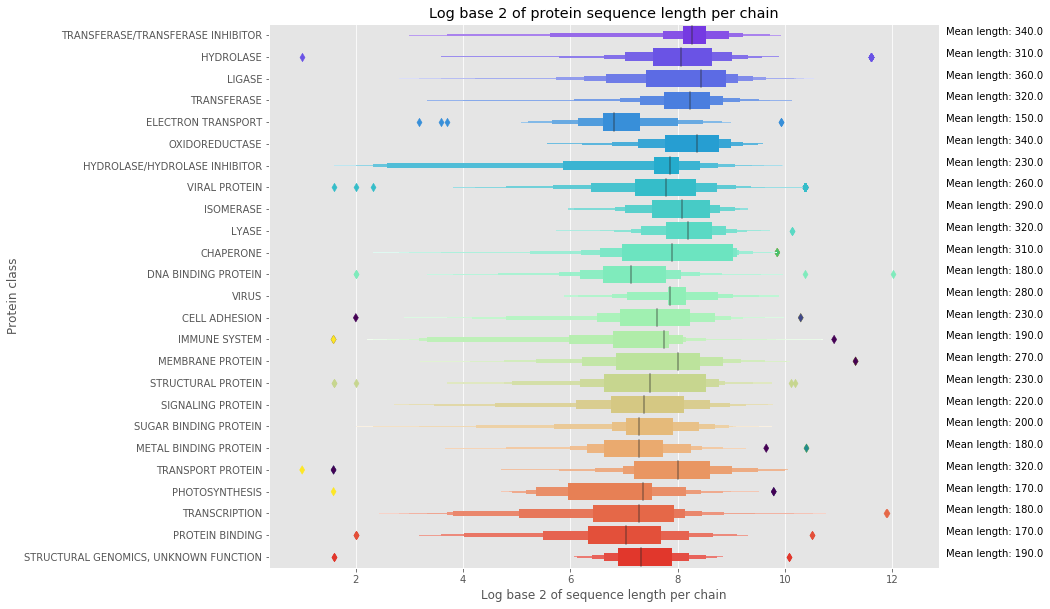

In [45]:
import seaborn as sns
plt.figure(figsize=(12,10))
g = sns.boxenplot(y="classification", x="num_residues_log",
                 data=proteins[proteins['classification'].isin(top_25)], palette="rainbow",k_depth='trustworthy',
                 linewidth=9)
plt.title('Log base 2 of protein sequence length per chain')
plt.xlabel('Log base 2 of sequence length per chain')
plt.ylabel('Protein class')
for i,prot in enumerate(g.get_yticklabels()):
    label = str(prot).split("'")[1]
    prot_resdcnt = proteins[proteins['classification'] == label]['num_residues']
    mean = np.mean(prot_resdcnt)
    g.text(13,i,"Mean length: "+str(np.round(mean,-1)))

Perform Anova

In [46]:
all_log_residue_count = []
for i in top_25:
    list_to_add = list(proteins[proteins['classification'] == i]["num_residues_log"])
    all_log_residue_count.append(list_to_add)
f,p = stats.f_oneway(*all_log_residue_count)
f,p

(1436.468965980377, 0.0)

In [51]:
f,p = stats.f_oneway(all_log_residue_count[0], all_log_residue_count[12])
f,p

(79.34205340756907, 5.390302125712218e-19)

### Encode the labels and Amino acid sequences letter
* This is getting ahead of myself for the initial EDA of the data collected
* But I will need this later!
* But first drop nan in the classifcation column

In [52]:
proteins = proteins[proteins['classification'].notnull()]
len(proteins)

346321

In [53]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(proteins['classification'].astype(str))

In [54]:
lb.classes_

array(['3-EPIMERASE', "5'-3' EXO/ENDO NUCLEASE", 'ACARBOSE', ...,
       'viral protein/signaling protein',
       'viral protein/transcription inhibitor', 'virus/inhibitor'],
      dtype='<U67')

In [55]:
len(lb.classes_)

4468

In [56]:
set(lb.classes_) == set(proteins['classification'].unique())

True

WOOOOHOOO! I didn't mess up!

In [57]:
Y[45].shape

(4468,)

# Note the labels are in order
* in the paper they assign, each amino acid a a number
* look up table is created, and instead of using the letter, they assign it a number

In [58]:
proteins.shape

(346321, 20)

In [59]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 1024

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(proteins['sequence'])
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(proteins['sequence'])
X = sequence.pad_sequences(X, maxlen=max_length)

Using TensorFlow backend.


In [60]:
X[67585], X.shape

(array([ 0,  0,  0, ..., 11, 10, 10], dtype=int32), (346321, 1024))

### What are the total counts of each amino acid

In [61]:
tokenizer.word_counts

OrderedDict([('m', 2172049),
             ('v', 6409969),
             ('l', 8284596),
             ('s', 5862224),
             ('e', 6030895),
             ('g', 6852144),
             ('w', 1266349),
             ('q', 3477229),
             ('h', 2483484),
             ('a', 7360466),
             ('k', 5197247),
             ('d', 5228821),
             ('i', 5136489),
             ('r', 4525087),
             ('f', 3625300),
             ('p', 4281039),
             ('t', 5179201),
             ('y', 3178663),
             ('n', 3903645),
             ('c', 1276847),
             ('x', 417241),
             ('u', 72),
             ('z', 53),
             ('b', 33),
             ('o', 2)])

### Create lookup table matching amino acids to biological name

In [62]:
tokenizer.word_counts.keys(), len(tokenizer.word_counts.keys())

(odict_keys(['m', 'v', 'l', 's', 'e', 'g', 'w', 'q', 'h', 'a', 'k', 'd', 'i', 'r', 'f', 'p', 't', 'y', 'n', 'c', 'x', 'u', 'z', 'b', 'o']),
 25)

In [63]:
amino_acid_names = ['Methionine',
                   'Valine',
                   'Leucine',
                   'Serine',
                   'Glutamate',
                   'Glycine',
                   'Tryptophan',
                   'Glutamine',
                   'Histidine',
                   'Alanine',
                   'Lysine',
                   'Aspartate',
                   'Isoleucine',
                   'Arginine',
                   'Phenylalanine',
                   'Proline',
                   'Threonine',
                   'Tyrosine',
                   'Asparagine',
                   'Cysteine',
                   'Any Acid',
                   'Selenocysteine',
                   'Glutamic Acid',
                   'Aspartate',
                   'Pyrrolysine']
len(amino_acid_names)

25

### Across all proteins, what are the counts of each kind of amino acid

Text(0, 0.5, 'Amino Acid')

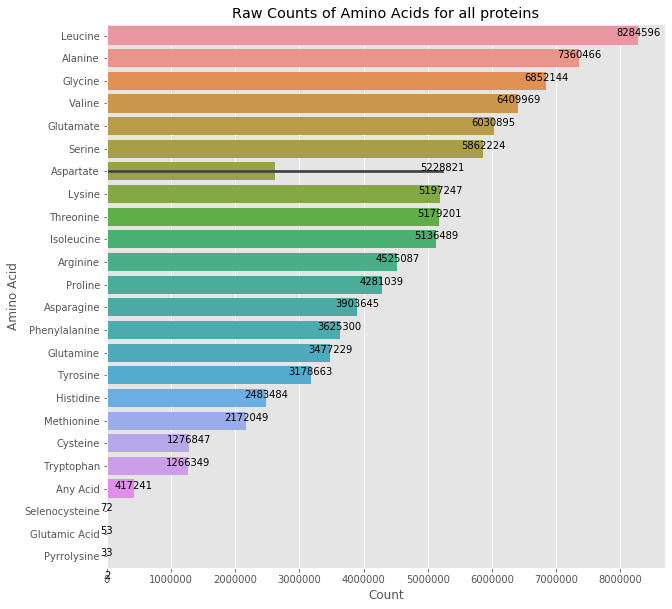

In [64]:
a = pd.DataFrame(tokenizer.word_counts.items(),columns=['Amino_Acid',
                                                        'Num_Instances'])
a['Full_Name'] = amino_acid_names
a = a.sort_values(by='Num_Instances', ascending=False).reset_index()
plt.figure(figsize=(10,10))
g = sns.barplot(data=a, y='Full_Name',x ='Num_Instances')
for index,row in a.iterrows():
    g.text(row.Num_Instances, index, row.Num_Instances, ha='center',size=10)
plt.title('Raw Counts of Amino Acids for all proteins')
plt.xlabel('Count')
plt.ylabel('Amino Acid')


### Now normalize to gain a percent?

Text(0, 0.5, 'Amino Acid')

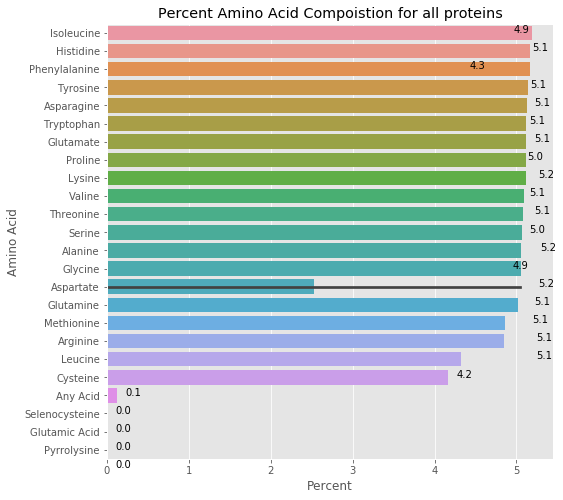

In [65]:
b = pd.DataFrame(tokenizer.word_docs.items(),columns=['Amino_Acid', 'Percent_Makeup'])
b['Full_Name'] = amino_acid_names
sum_all = np.sum(b['Percent_Makeup'])
b['Percent_Makeup'] = b['Percent_Makeup'].apply(lambda x: (x/sum_all)*100)
b = b.sort_values(by= ['Percent_Makeup'],ascending = False)
plt.figure(figsize=(8,8))
g = sns.barplot(data=b, y='Full_Name', x='Percent_Makeup')
for index,row in b.iterrows():
    g.text(row.Percent_Makeup + .2, index, np.round(row.Percent_Makeup,1), ha='center',size=10)
plt.title('Percent Amino Acid Compoistion for all proteins')
plt.xlabel('Percent')
plt.ylabel('Amino Acid')



Amino acids u,x,b,z,o are not that prevalaent in protein sequences

Extra question: is there a difference in amino acid composition amoung the classes of proetins?

In [66]:
tokenizer.word_index

{'l': 1,
 'a': 2,
 'g': 3,
 'v': 4,
 'e': 5,
 's': 6,
 'd': 7,
 'k': 8,
 't': 9,
 'i': 10,
 'r': 11,
 'p': 12,
 'n': 13,
 'f': 14,
 'q': 15,
 'y': 16,
 'h': 17,
 'm': 18,
 'c': 19,
 'w': 20,
 'x': 21,
 'u': 22,
 'z': 23,
 'b': 24,
 'o': 25}

In [67]:
a = list(proteins['sequence'].iloc[5].lower())
from collections import Counter


keys  = list(Counter(a).keys()) # equals to list(set(words))
values = list(Counter(a).values())
results = np.zeros(len(tokenizer.word_index))
order_keys = list(tokenizer.word_index.keys())
#traverse order keys, 
for i in range(0,len(order_keys)):
    if order_keys[i] in keys:
        #find index
        idx1 = keys.index(order_keys[i])
        #use index to get count from values
        count = values[idx1]
        #put count in results
        results[i] = count
    else:
        results[i] = 0

In [68]:
len(results)

25

In [69]:
results

array([16., 18., 11.,  9.,  8.,  6., 10., 13., 12., 10., 13.,  3., 12.,
        5.,  5.,  6.,  1.,  5.,  0.,  3.,  0.,  0.,  0.,  0.,  0.])

In [70]:
#now into a function
def count_amino_acids(sequence):
    a = list(sequence.lower())
    keys  = list(Counter(a).keys()) # equals to list(set(words))
    values = list(Counter(a).values())
    results = np.zeros(len(tokenizer.word_index))
    order_keys = list(tokenizer.word_index.keys())
    #traverse order keys, 
    for i in range(0,len(order_keys)):
        if order_keys[i] in keys:
            #find index
            idx1 = keys.index(order_keys[i])
            #use index to get count from values
            count = values[idx1]
            #put count in results
            results[i] = count
        else:
            results[i] = 0
    #normalize results
    #results = (results / np.sum(results))*100
    return(results)

In [71]:
#now apply across dataframe
all_reults = []
for i in range(0,proteins.shape[0]):
    #get the sequecne
    seq_to_examine = proteins['sequence'].iloc[i]
    #get the counts
    count_results = count_amino_acids(seq_to_examine)
    all_reults.append(count_results)

In [72]:
count_aa = pd.DataFrame(np.vstack(all_reults),columns=list(tokenizer.word_index.keys()))

In [73]:
proteins = pd.concat([proteins.reset_index(),count_aa],axis=1)

In [75]:
proteins.head()

,level_0,index,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,...,y,h,m,c,w,x,u,z,b,o
0,0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,...,3.0,12.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.74,...,6.0,1.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,1.84,...,3.0,11.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.90,...,6.0,1.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,...,3.0,11.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


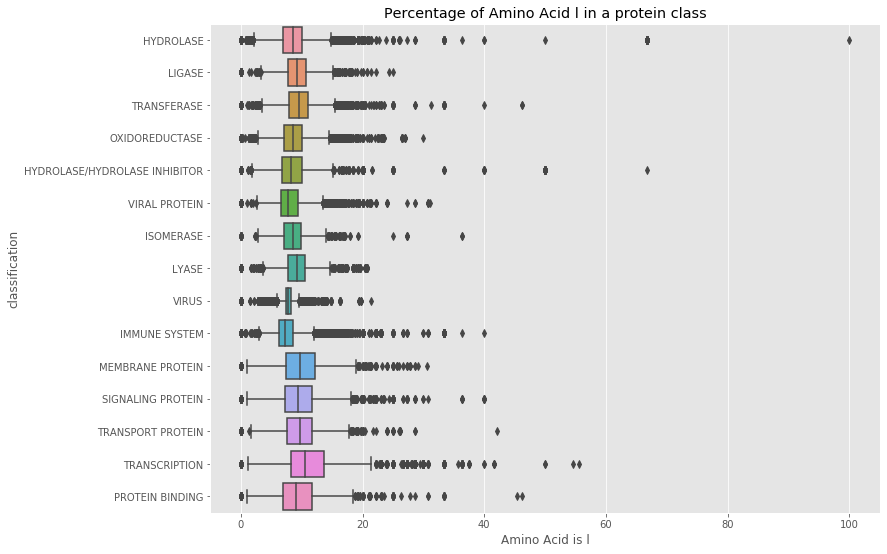

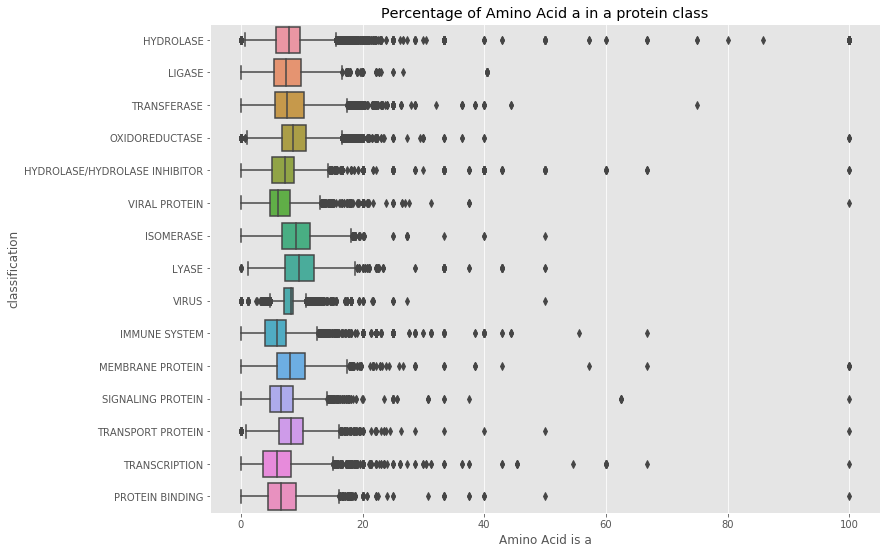

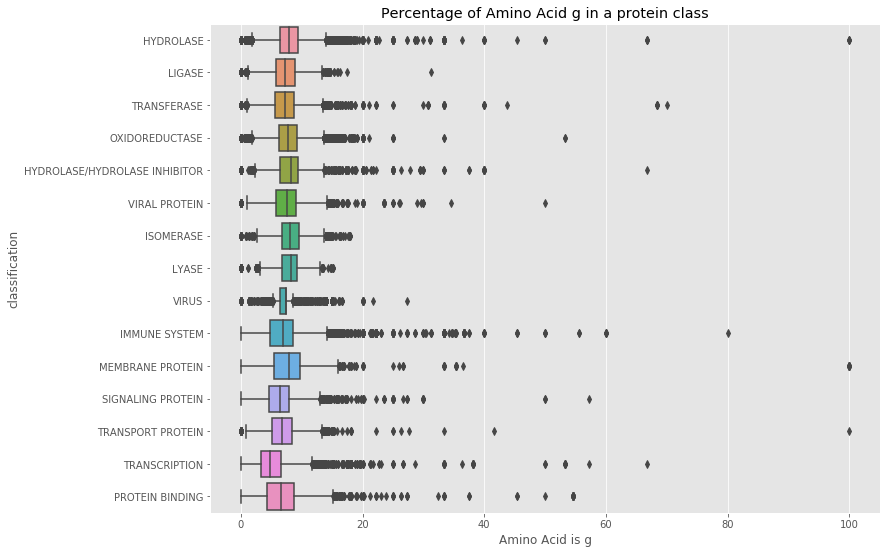

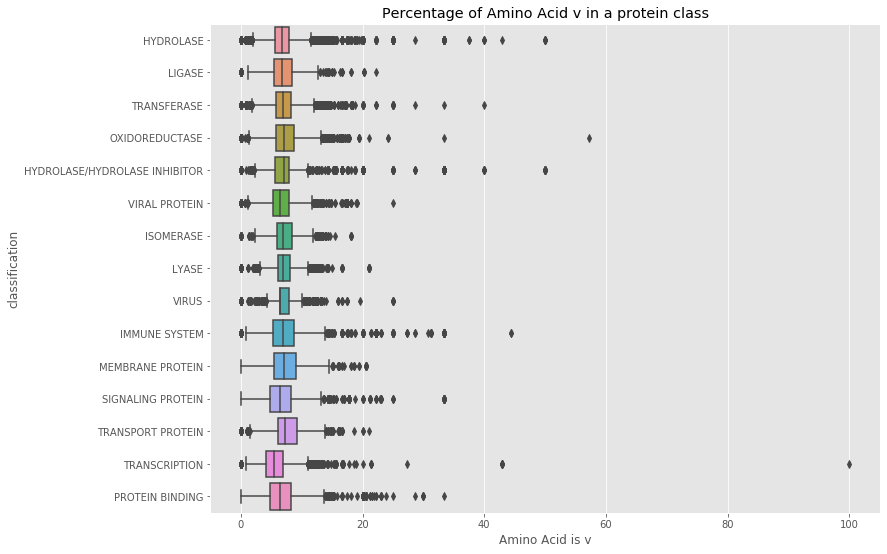

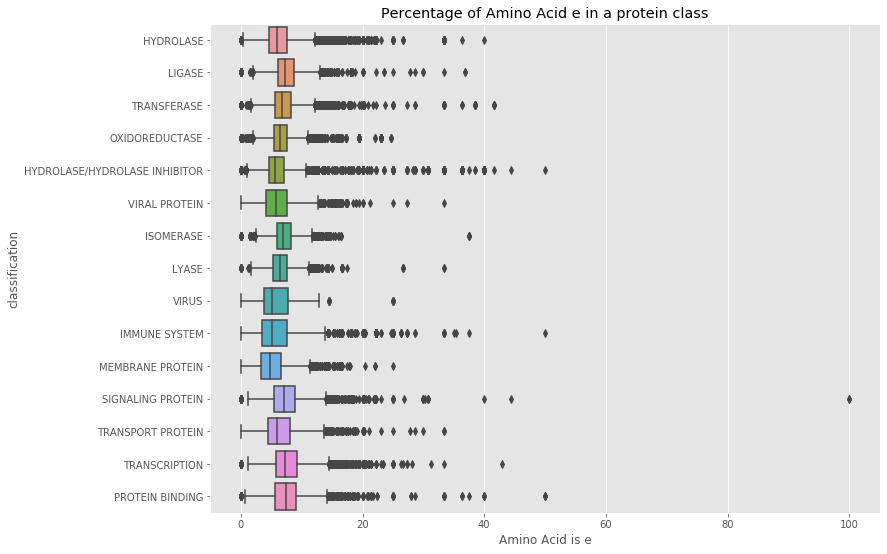

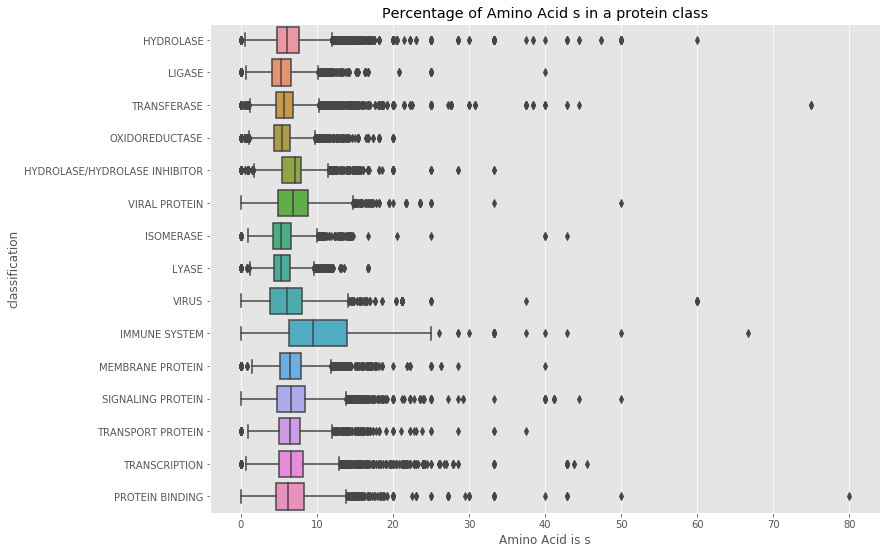

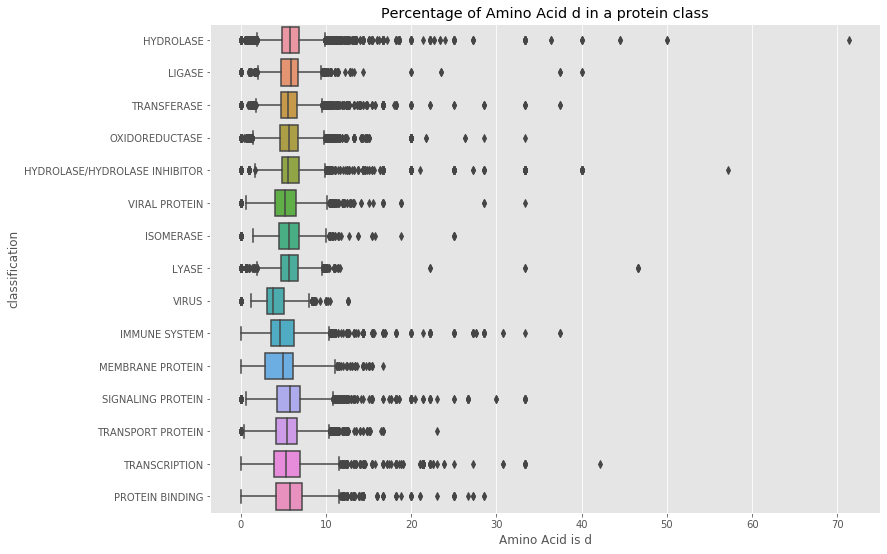

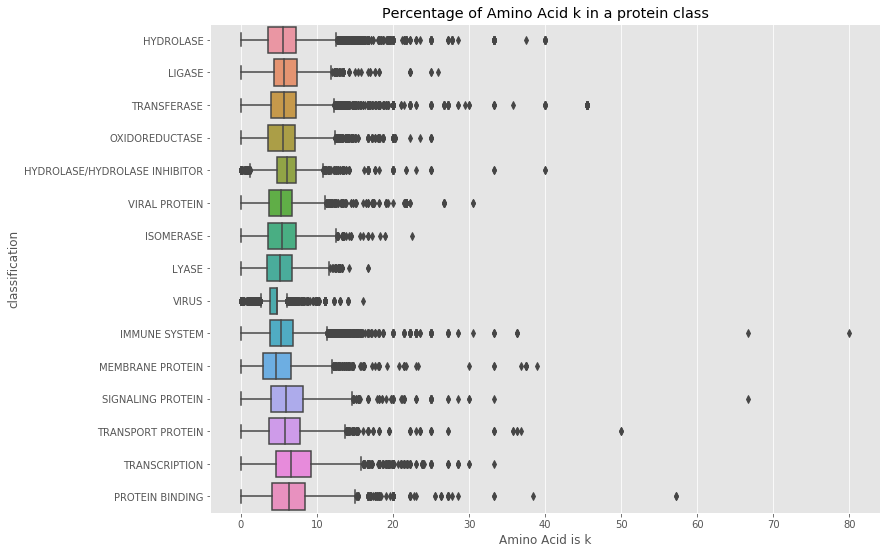

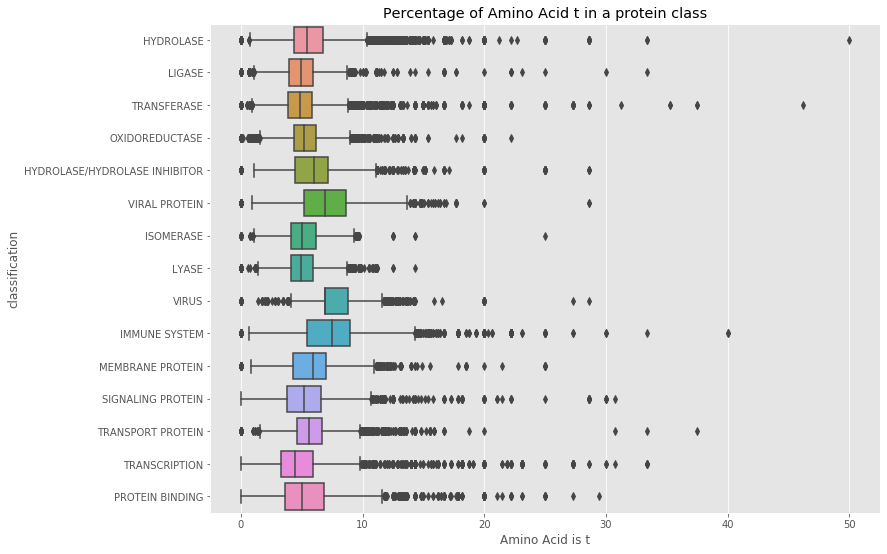

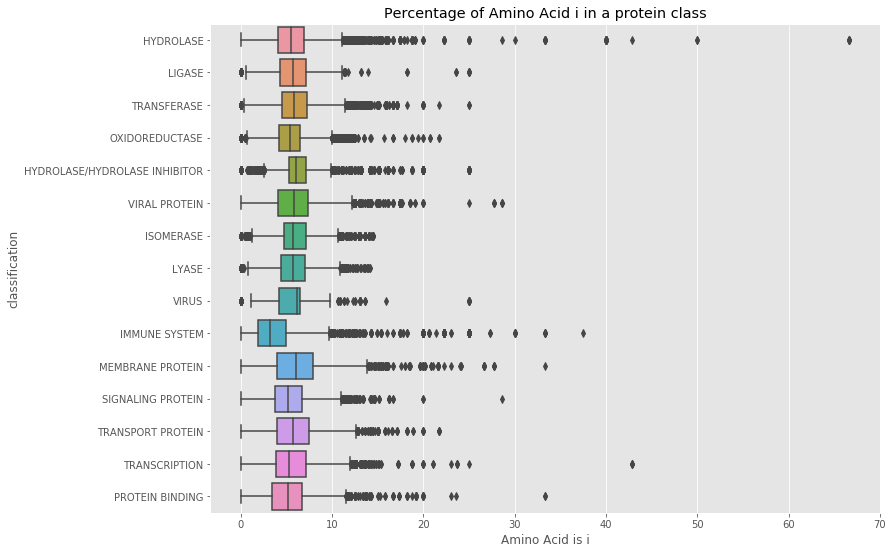

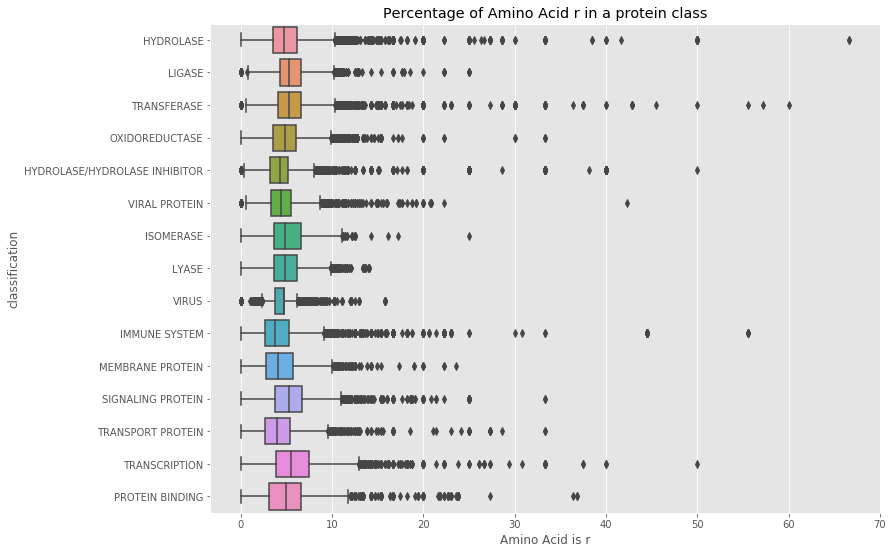

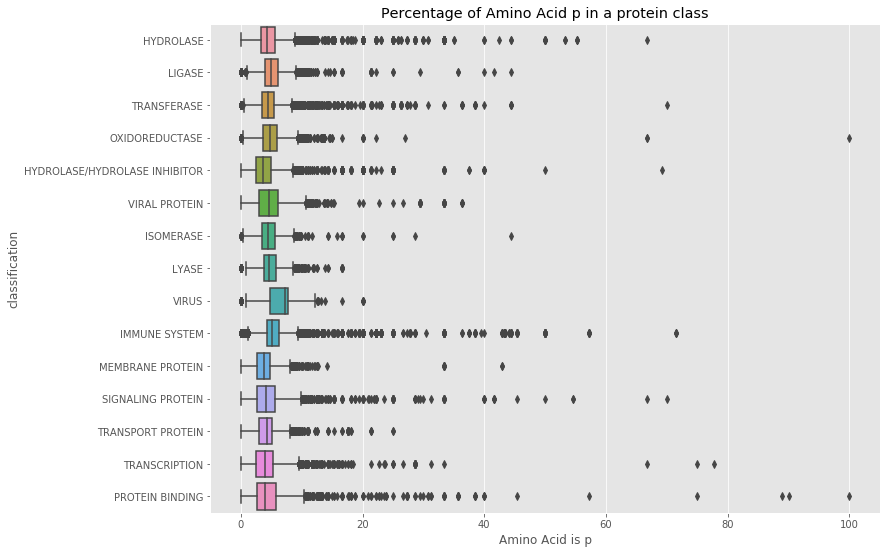

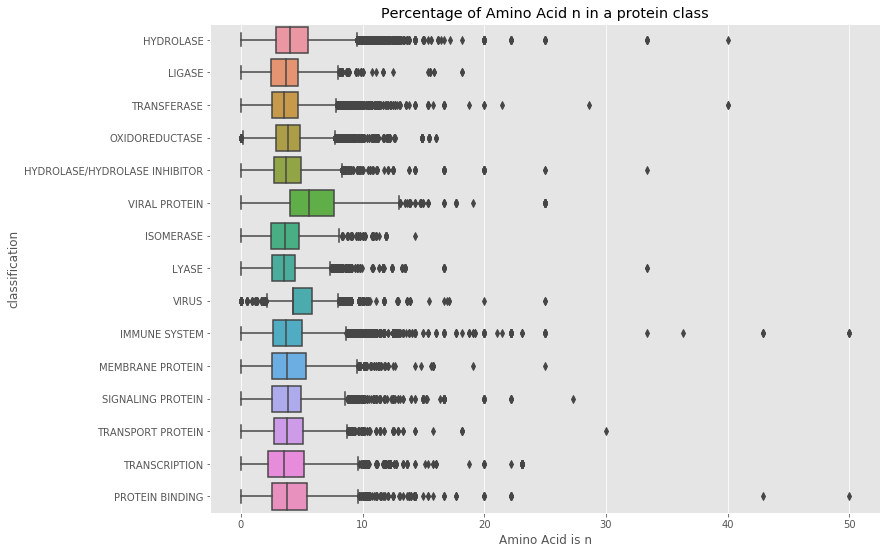

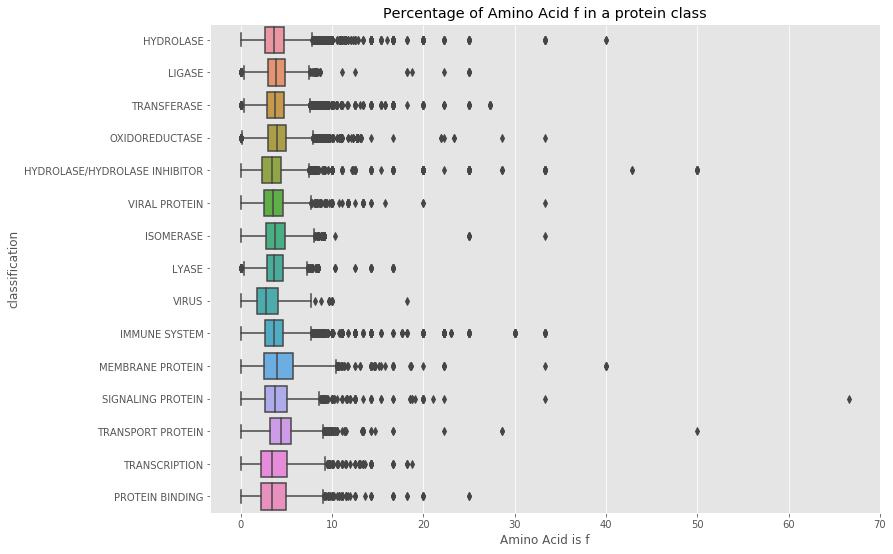

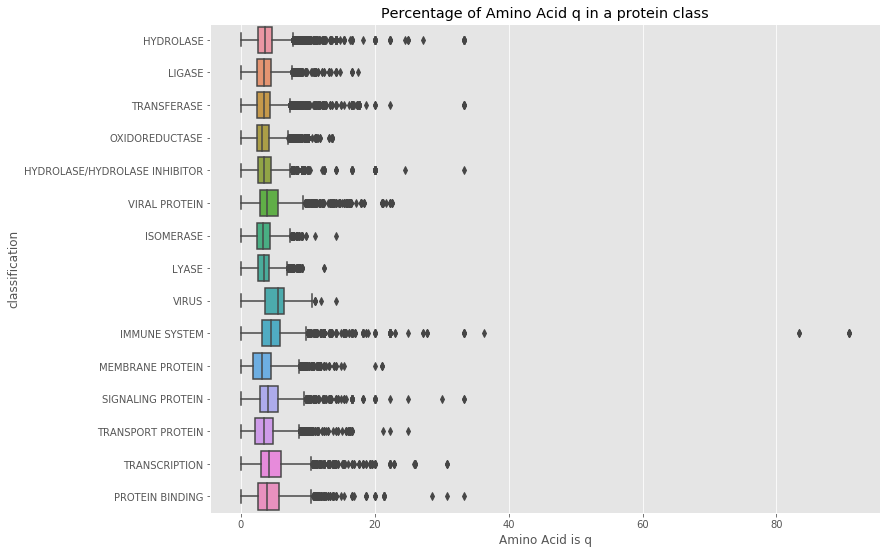

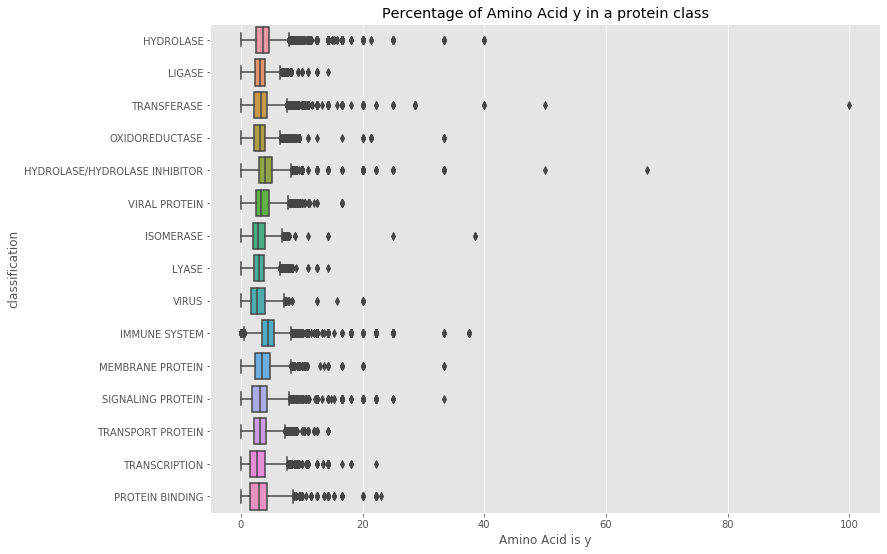

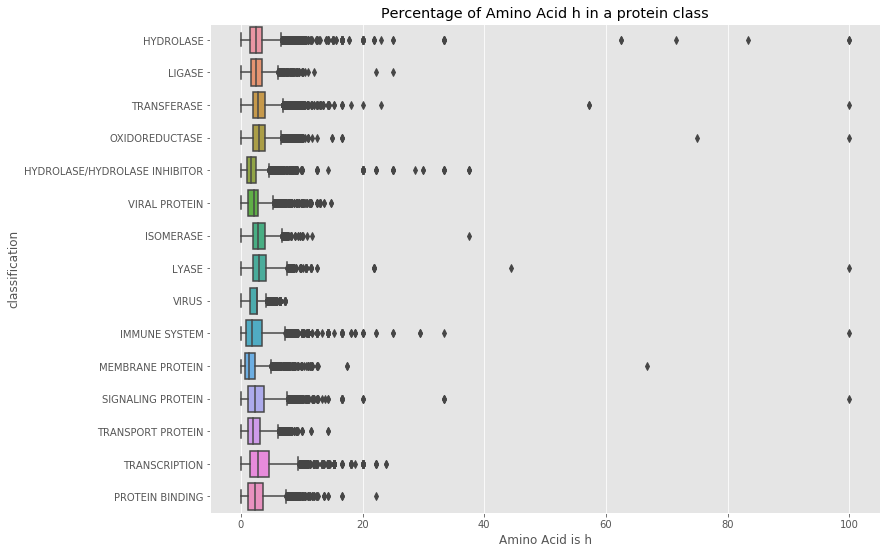

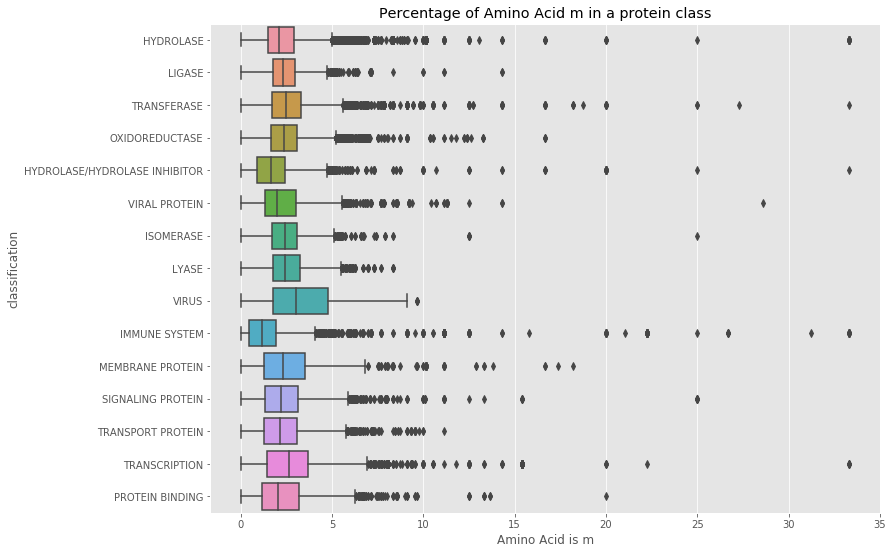

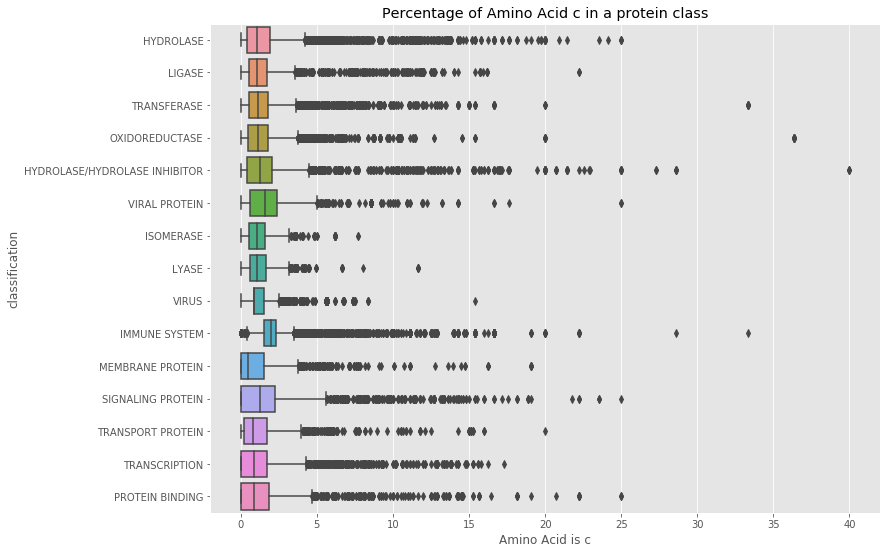

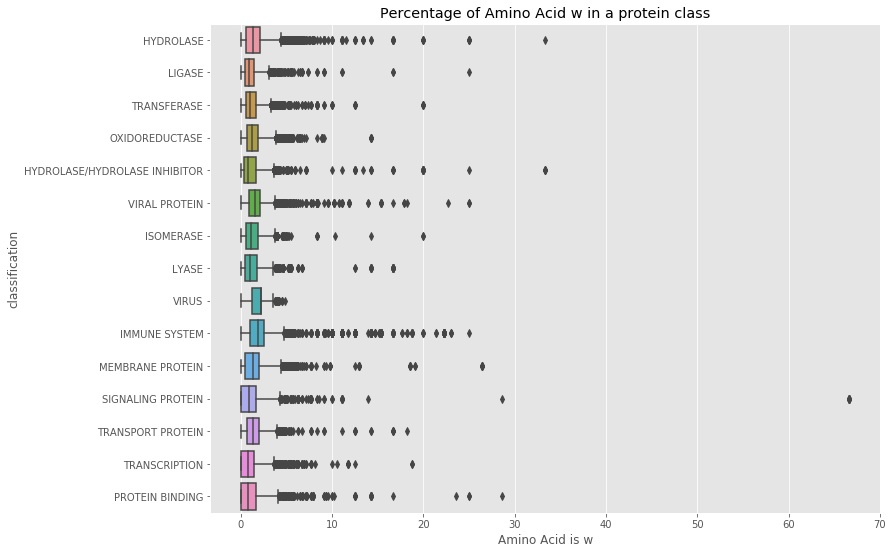

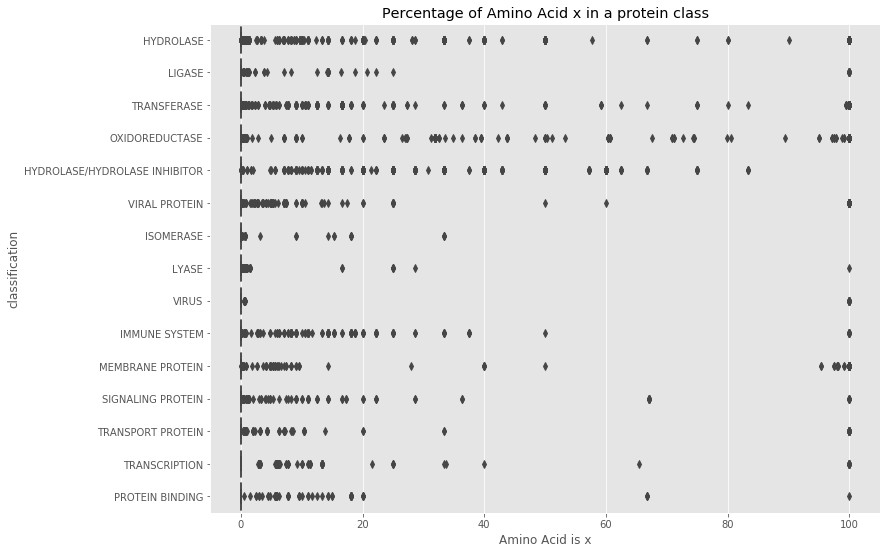

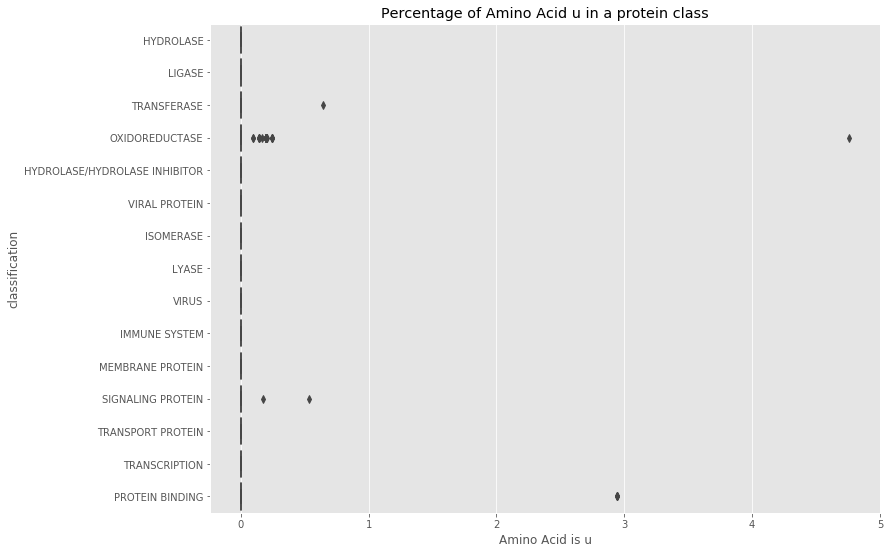

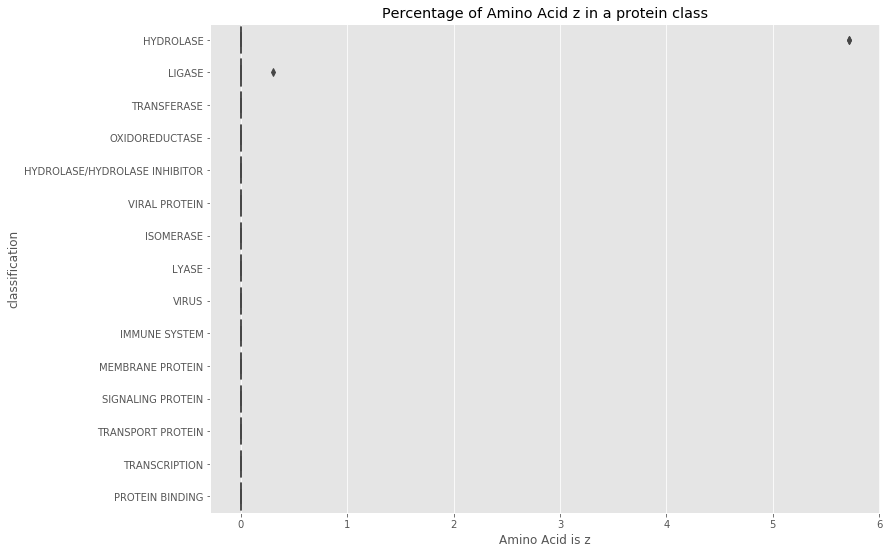

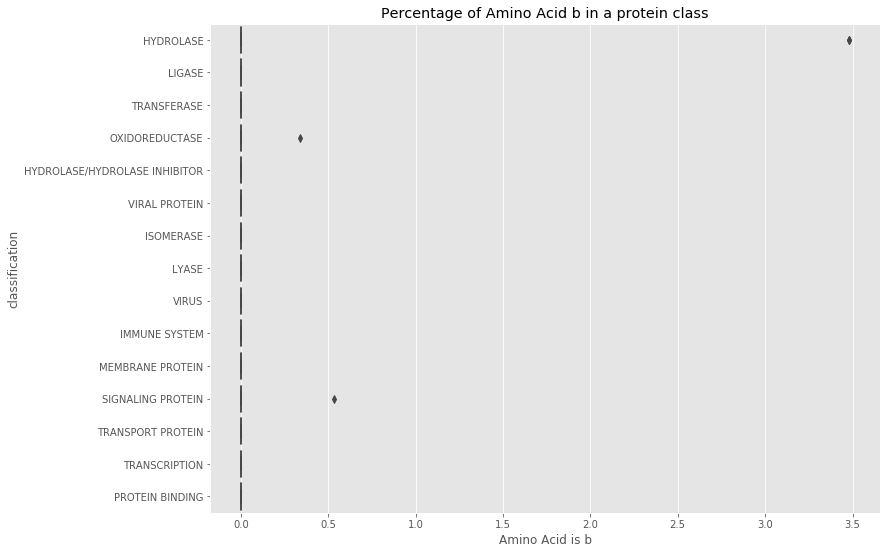

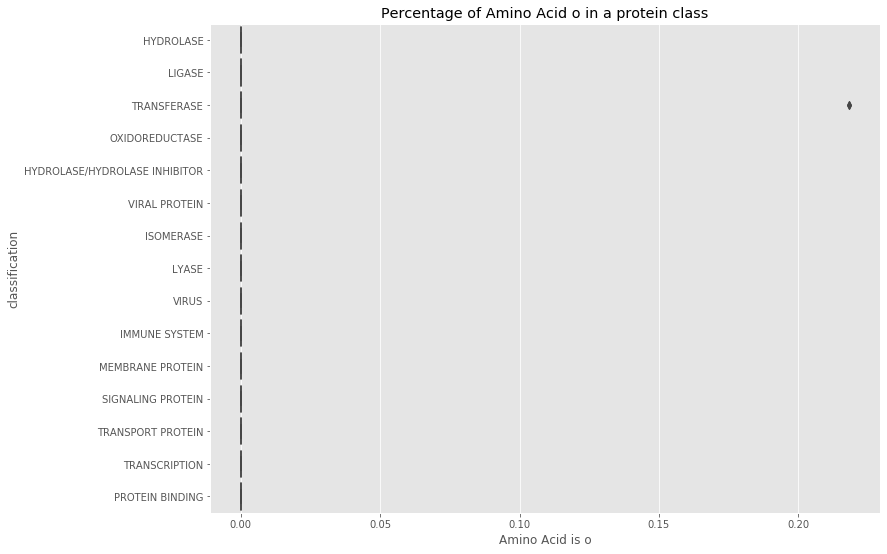

In [298]:
for a in order_keys:
    plt.figure(figsize=(12,9))
    sns.boxplot(data=proteins[proteins['classification'].isin(top_15)],
                x=a,y='classification')
    plt.xlabel('Amino Acid is '+a)
    plt.title('Percentage of Amino Acid '+ a + ' in a protein class')
    plt.show()

In [76]:
orderded_columns = ['level_0', 'index', 'structureId', 'chainId', 'sequence',
       'residueCount', 'macromoleculeType', 'classification',
       'experimentalTechnique', 'resolution', 'structureMolecularWeight',
       'crystallizationMethod', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'pdbxDetails', 'phValue', 'publicationYear',
       'num_residues', 'residueCount_log', 'num_residues_log','m', 'v', 'l', 's', 'e', 
                    'g', 'w', 'q', 'h', 'a', 'k', 'd', 'i', 'r', 'f', 'p', 't', 'y', 'n', 
                    'c', 'x', 'u', 'z', 'b', 'o']
proteins = proteins[orderded_columns]
#update column names
orderded_columns = ['level_0', 'index', 'structureId', 'chainId', 'sequence',
       'residueCount', 'macromoleculeType', 'classification',
       'experimentalTechnique', 'resolution', 'structureMolecularWeight',
       'crystallizationMethod', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'pdbxDetails', 'phValue', 'publicationYear',
       'num_residues', 'residueCount_log', 'num_residues_log','Methionine',
                   'Valine',
                   'Leucine',
                   'Serine',
                   'Glutamate',
                   'Glycine',
                   'Tryptophan',
                   'Glutamine',
                   'Histidine',
                   'Alanine',
                   'Lysine',
                   'Aspartate',
                   'Isoleucine',
                   'Arginine',
                   'Phenylalanine',
                   'Proline',
                   'Threonine',
                   'Tyrosine',
                   'Asparagine',
                   'Cysteine',
                   'Any Acid',
                   'Selenocysteine',
                   'Glutamic Acid',
                   'Aspartate',
                   'Pyrrolysine']
proteins.columns = orderded_columns

In [79]:
proteins[amino_acid_names].head()

,Methionine,Valine,Leucine,Serine,Glutamate,Glycine,Tryptophan,Glutamine,Histidine,Alanine,...,Threonine,Tyrosine,Asparagine,Cysteine,Any Acid,Selenocysteine,Glutamic Acid,Aspartate,Aspartate,Pyrrolysine
0,3.0,9.0,18.0,6.0,14.0,11.0,2.0,5.0,12.0,17.0,...,5.0,3.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
1,5.0,9.0,16.0,6.0,8.0,11.0,3.0,5.0,1.0,17.0,...,12.0,6.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
2,3.0,8.0,18.0,6.0,14.0,11.0,2.0,5.0,11.0,18.0,...,5.0,3.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
3,5.0,9.0,17.0,7.0,8.0,11.0,3.0,5.0,1.0,16.0,...,12.0,6.0,12.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
4,3.0,8.0,18.0,6.0,14.0,11.0,2.0,5.0,11.0,18.0,...,5.0,3.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0


In [80]:
1/27

0.037037037037037035

Peform chi squared test

In [86]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(proteins[amino_acid_names].values, correction=True)
chi2, p, dof, ex, ex.shape

(96045231.46095668,
 0.0,
 9004320,
 array([[3.56885378e+00, 1.05321022e+01, 1.36122674e+01, ...,
         8.59137966e+00, 5.42216933e-05, 3.28616323e-06],
        [3.90343382e+00, 1.15194868e+01, 1.48884175e+01, ...,
         9.39682150e+00, 5.93049771e-05, 3.59424104e-06],
        [3.56885378e+00, 1.05321022e+01, 1.36122674e+01, ...,
         8.59137966e+00, 5.42216933e-05, 3.28616323e-06],
        ...,
        [9.50207319e+00, 2.80417222e+01, 3.62426619e+01, ...,
         2.28745483e+01, 1.44365259e-04, 8.74940961e-06],
        [9.50207319e+00, 2.80417222e+01, 3.62426619e+01, ...,
         2.28745483e+01, 1.44365259e-04, 8.74940961e-06],
        [9.50207319e+00, 2.80417222e+01, 3.62426619e+01, ...,
         2.28745483e+01, 1.44365259e-04, 8.74940961e-06]]),
 (346321, 27))

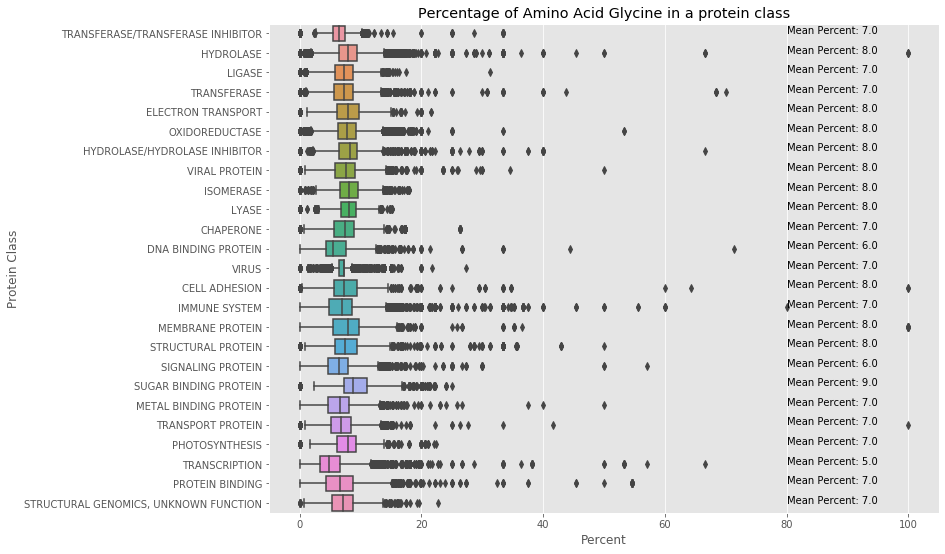

In [318]:
plt.figure(figsize=(12,9))
g = sns.boxplot(data=proteins[proteins['classification'].isin(top_25)],
            x='Glycine',y='classification')
for i,prot in enumerate(g.get_yticklabels()):
    label = str(prot).split("'")[1]
    prot_resdcnt = proteins[proteins['classification'] == label]['Glycine']
    mean = np.mean(prot_resdcnt)
    g.text(80,i,"Mean Percent: "+str(np.round(mean)))
plt.title('Percentage of Amino Acid Glycine in a protein class')
plt.xlabel('Percent')
plt.ylabel('Protein Class')
plt.show()

In [311]:
g.get_yticklabels()[0]

Text(0, 0, 'TRANSFERASE/TRANSFERASE INHIBITOR')

### To consider
* I could group a bunch of amino acids together, these are called motifs, and see if certain motifs are present in a class of proteins
* When creating a classifcation model, it might be hard trying to classify all 4468 proteins, maybe just try a few or assign a threshold and use those classes above that threshold
* intereating enough amino acids are not used as much: x, u, z, b, which correspond to  any amino acid, selenocystein, gluatamine, asparagine, 
* i thought there would be more glutamine than aspargine
